In [15]:
import gym

env = gym.make("Taxi-v2").env

env.render()

[2020-09-08 00:38:03,086] Making new env: Taxi-v2


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [27]:
import numpy as np
q_table = np.zeros([env.observation_space.n,env.action_space.n])
alpha = 0.1
gamma = 0.9
epsilon = 0.1
R=[]
for i in range(1,100000):
    state = env.reset()
    done = False
    rewards = 0
    if i>20000:
        epsilon =0.01 
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        next_state,reward,done,info=env.step(action)
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state,action] = new_value
        rewards =rewards +reward
        state = next_state
    R.append(rewards)

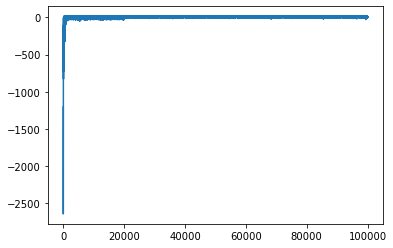

In [28]:
import matplotlib.pyplot as plt
plt.plot(R)

In [30]:
from IPython.display import clear_output
episodes =30
epsilon = 0.01
rewards=[]
frames = [] # for animation
for i in range(0,episodes):
    state = env.reset()
    done = False
    R=0
    index= 0
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        next_state,reward,done,info=env.step(action)
        old_value = q_table[state,action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state,action] = new_value
        R = R + reward
        
        index = index+1
        state = next_state
        frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward,
        'index':index,
            'R':R
        })
        
    rewards.append(R)

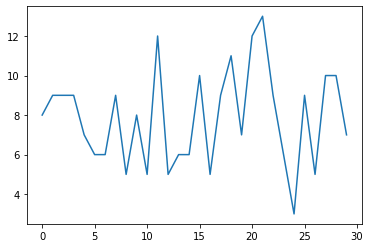

In [31]:
print(np.sum(rewards)/episodes)
plt.plot(rewards)

In [ ]:
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'].getvalue())
        print(f"Timestep: {frame['index']}")
        print(f"R: {frame['R']}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.2)
        
print_frames(frames)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)

Timestep: 9
R: -9
State: 318
Action: 0
Reward: -1
